<a href="https://colab.research.google.com/github/afifrahmann/Exploratory-Data-Analysis-Practice/blob/master/Explanatory_Data_Analysis_(EDA)_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explanatory Data Analysis - Machine Learning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**Product Classification**<br>
**Deskripsi**<br>
* Memprediksi apakah suatu produk eksklusif atau tidak berdasarkan fitur yang tersedia<br>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Describe Data

## Load Data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CV/Portofolio Afif Rahman/Explanatory Data Analysis - Machine Learning/Product_Exclusive_Classification.csv')
data.head(5)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


## Describe Data

# Exploratory Data Analysis (EDA)

Pertama, kita lihat daftar kolom yang ada di dalam dataset dan pisahkan menjadi kolom numerik dan kategori dengan menggunakan `info()`:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [ ]:
cats = ['brand', 'category']
nums = ['rating', 'number_of_reviews', 'love', 'price', 'value_price']

## Pendekatan Numerik

Untuk melihat gambaran besar data secara numerik, kita dapat menggunakan fungsi `describe()` sebagai berikut:

In [ ]:
data.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


Perhatikan bahwa *by default*, penggunaan `describe()` hanya akan memunculkan data dari kolom-kolom yang bertipe numerik. Untuk melihat statistik dari kolom-kolom kategori, kita perlu memastikan data yang di `describe()` hanya terdiri dari kolom kategori:

In [ ]:
data[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


Sampai disini ada beberapa hal yang sudah dapat disimpulkan:
- Beberapa kolom numerik *skew* (dilihat dari perbedaan yang besar antara *mean* dan *median*) seperti `number_of_reviews`, `love`, dan `price`
- Tidak ada kolom kategori yang perlu didrop karena hanya punya 1 nilai unik atau punya nilai unik sebanyak jumlah baris
- Ada kolom-kolom dengan nilai `null`

## Pendekatan Grafis

### Univariate Analysis

Untuk univariate analysis, kita gunakan *violin plot* untuk kolom numerik dan *count plot* untuk kolom kategori. Sedikit berbeda dengan contoh ketika sesi, disini plot dipisah menjadi 2 berdasarkan target, ini berguna untuk melihat apakah ada perbedaan antara kelas positif dan negatif.

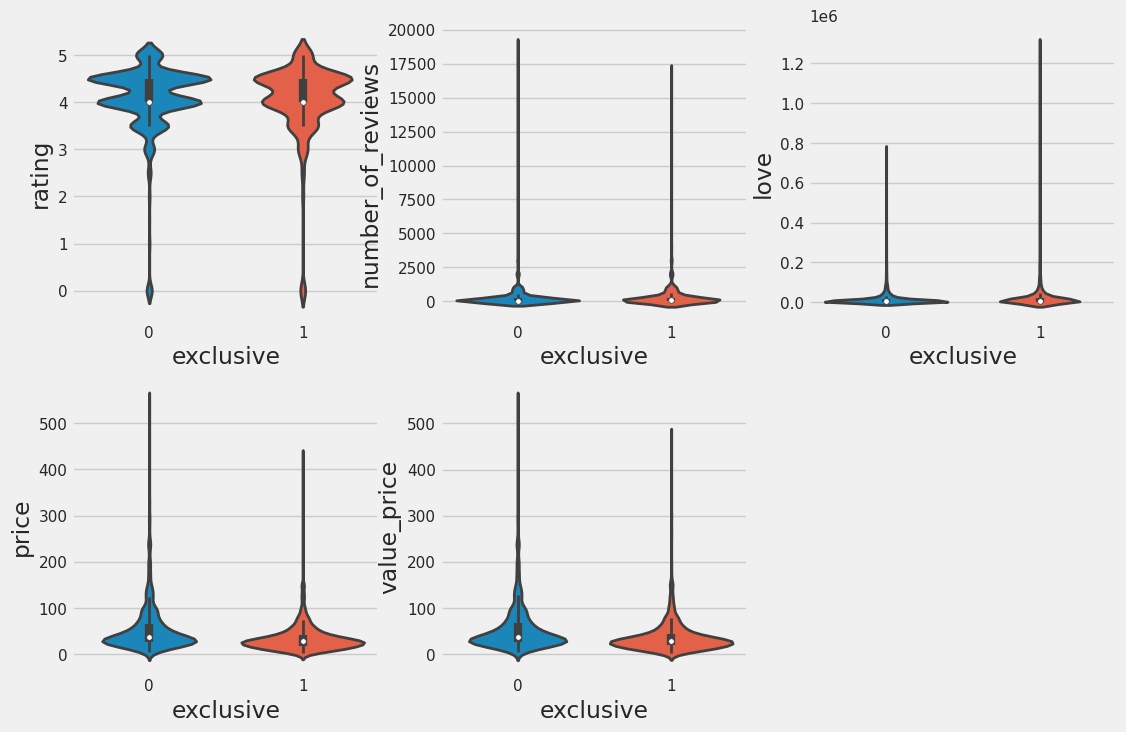

In [ ]:
import math

plt.figure(figsize=(12, 8))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 3, i+1)
  sns.violinplot(data=data, y=nums[i], x='exclusive', linewidth=2, orient='v')

Seperti yang telah terlihat melalui `describe()`, untuk kedua kolom kategori kita terlalu banyak nilai unique sehingga tidak masuk akal untuk melakukan univariate analysis dengan countplot seperti di bawah ini:

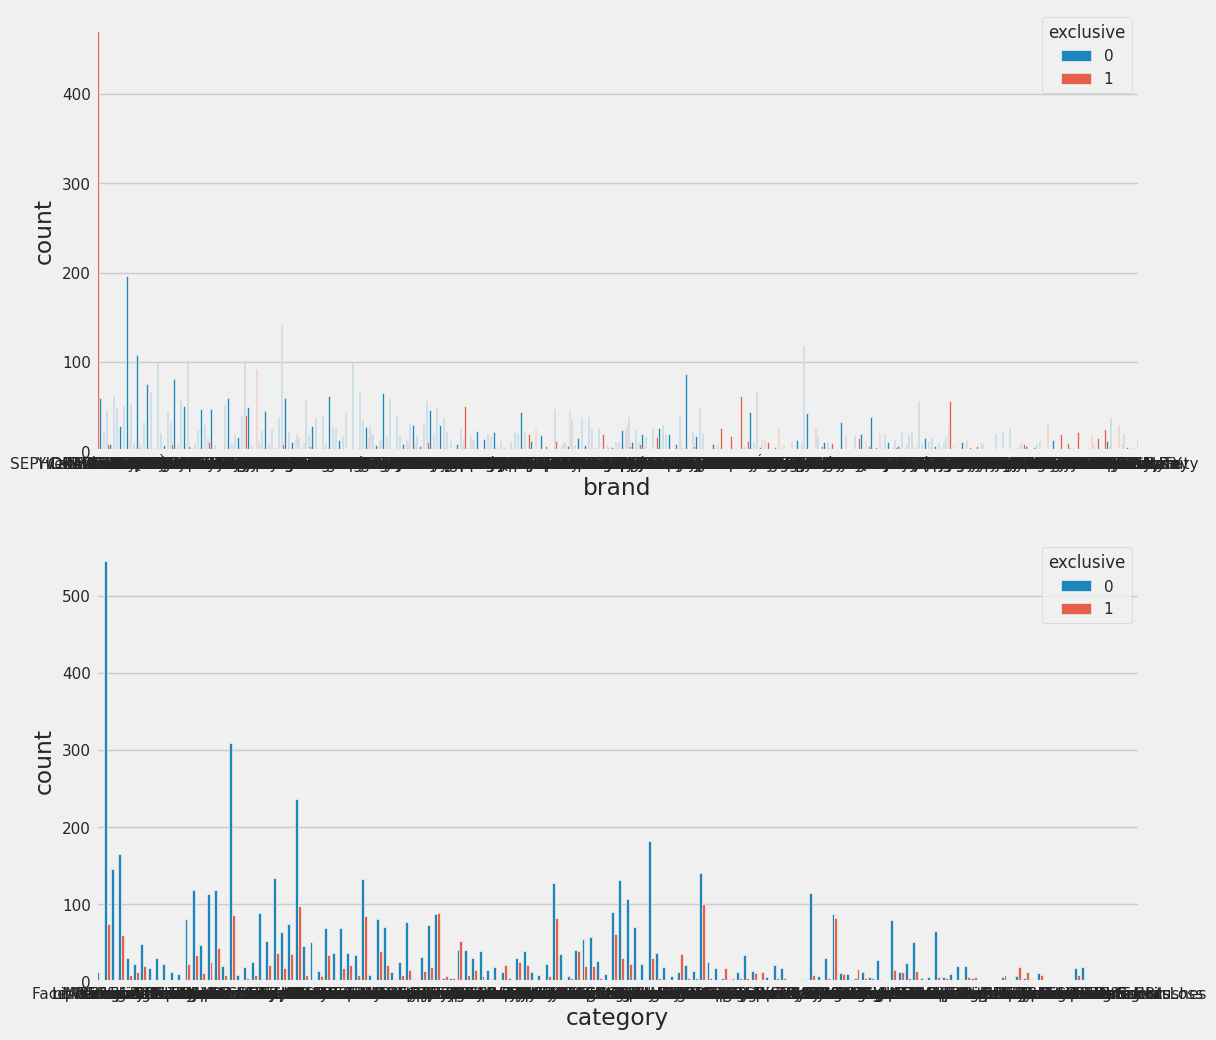

In [ ]:
plt.figure(figsize=(12, 12))
for i in range (0, len(cats)):
  plt.subplot(math.ceil(len(cats)/1), 1, i+1)
  sns.countplot(data=data, x=cats[i], hue='exclusive')

Alternatifnya, kita bisa cek saja nilai yang paling sering keluar dengan menggunakan `value_counts()`. Di bawah ini alih-alih mengeluarkan angka mentahnya, kita muncul kan persentase:

In [ ]:
for cat in cats:
  print('Category: ', cat)
  display((data[cat].value_counts() / len(data) * 100)[:10])
  print()

Category:  brand


SEPHORA COLLECTION    6.1500
CLINIQUE              2.6375
TOM FORD              1.8750
tarte                 1.7875
Kiehl's Since 1851    1.5250
Dior                  1.4750
Fresh                 1.3500
Lancôme               1.3000
Bumble and bumble     1.2375
MAKE UP FOR EVER      1.1875
Name: brand, dtype: float64


Category:  category


Perfume                      7.7375
Moisturizers                 4.9375
Face Serums                  4.1750
Value & Gift Sets            3.0125
Face Wash & Cleansers        2.8125
Face Masks                   2.7250
Hair Styling Products        2.6625
Rollerballs & Travel Size    2.6375
Face Brushes                 2.2000
Eye Creams & Treatments      2.1375
Name: category, dtype: float64

### Multivariate Analysis

Untuk multivariate analysis, ada 2 hal yang akan kita munculkan:
- Correlation heatmap untuk melihat korelasi linear antara kolom-kolom numerik
- Pairplot untuk melihat secara visual apakah ada pola yang terbentuk dari interaksi 2 kolom numerik

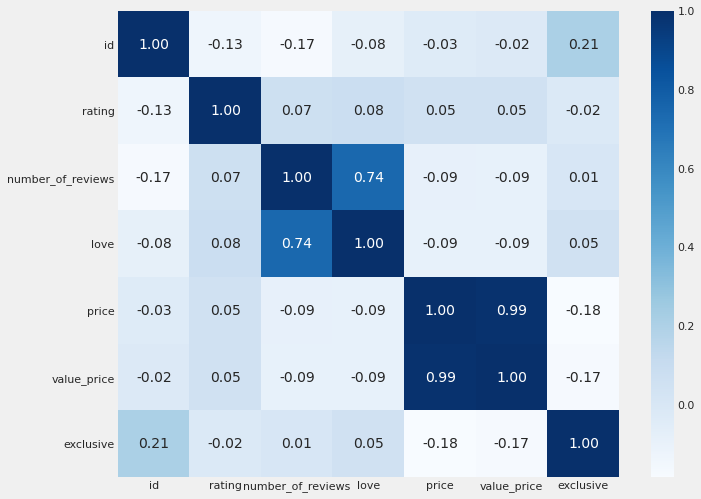

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

<Figure size 720x576 with 0 Axes>

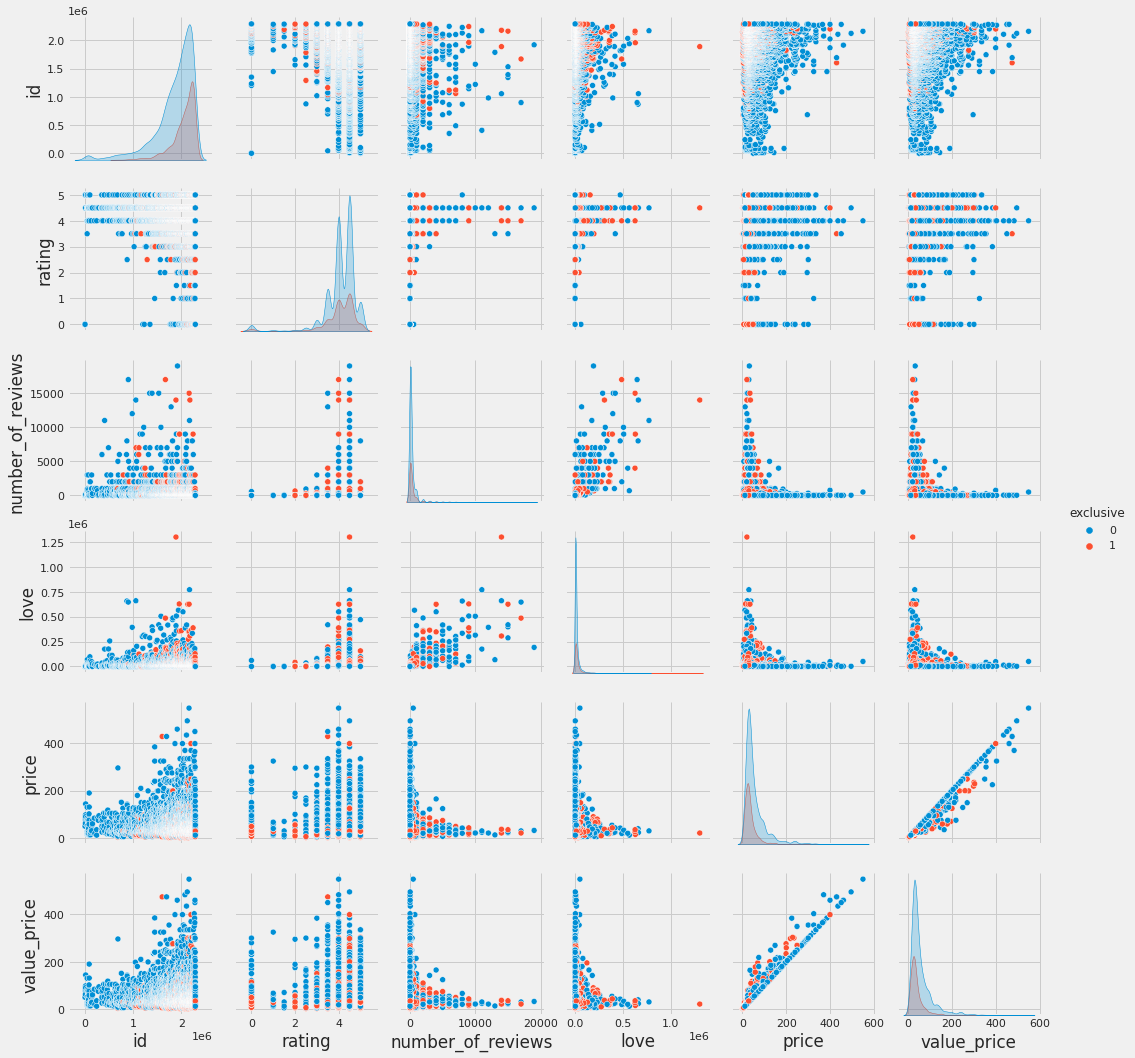

In [ ]:
plt.figure(figsize=(10, 8))
sns.pairplot(data, diag_kind='kde', hue='exclusive')

## Insight

Berikut beberapa insight yang dapat kita tarik dari univariate dan multivariate analysis di atas.

Univariate:
- Hampir semua kolom numerik memiliki outlier (kecuali rating (yang sepertinya memang hanya ada di range 0-5)
- Hampir semua kolom numerik memiliki distribusi yang *skew*
- Meskipun tidak terlalu besar, terlihat perbedaan di bentuk distribusi untuk setiap kolom numerik terutama `price`
- Distribusi kolom kategorik tidak terlalu timpang; untuk kedua kolom, kategori paling besar proporsinya < 10%

Multivariate:
- Terdapat multicollinearity antara kolom `price` dan `value_price`, berarti kita bsia membuang salah satunya
- Korelasi antara `love` dan `review` juga tinggi namun tidak cukup tinggi hingga bisa dihapus salah satunya
- Tidak ada kolom numerik yang berkorelasi kuat dengan target (`exclusive`)
- Tidak terlihat juga pola/cluster yang jelas di *pairplot* (sehingga itu, mungkin baik untuk menggunakan model yang nonlinear)

# Data Preparation

Dari hasil EDA yang telah kita lakukan tadi, cukup jelas perlakuan/*pre-processing* apa saja yang harus kita lakukan.

## Missing Value

Data masih punya lumayan banyak missing value. Kita pastikan sekali lagi jumlahnya dengan menggunakan `isna()`.

In [ ]:
data.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

Kita lihat bahwa seliain di kolom `id`, `brand`, dan `exclusive`, ada baris-baris yang `null`. Berhubung jumlahnya tidak banyak (maksimal sekitar 1-2% dari data), kali ini kita drop saja semua kolom yang `null`.

In [ ]:
data = data.dropna()

## Duplicate Values

Kita cek apakah ada data yang duplikat dari dataset dengan menggunakan `duplicated` seperti di bawah ini:

In [ ]:
data.duplicated().sum()

0

Karena tidak ada data yang duplikat, kita dapat melanjutkan langsung ke tahap selanjutnya.

## Outliers

Dari grafik yang kita keluarkan ketika EDA, kita tahu bahwa hampir semua kolom numerik memiliki outlier. Sebelum kita mengeluarkan outlier, karena kita tahu bahwa bentuk distribusi kolom-kolom ini condong ke kiri, kita coba normalkan dengan `log transformation` kecuali untuk kolom `rating`:

In [ ]:
for num in nums:
  if num not in ['id', 'rating']:
    data[num] = np.log(data[num] + (data[data[num] > 0][num].min() / 2)) # kita harus pastikan data tidak 0 untuk dilogtransform

Kita coba sekali lagi munculkan violin plot untuk setiap kolom numerik:

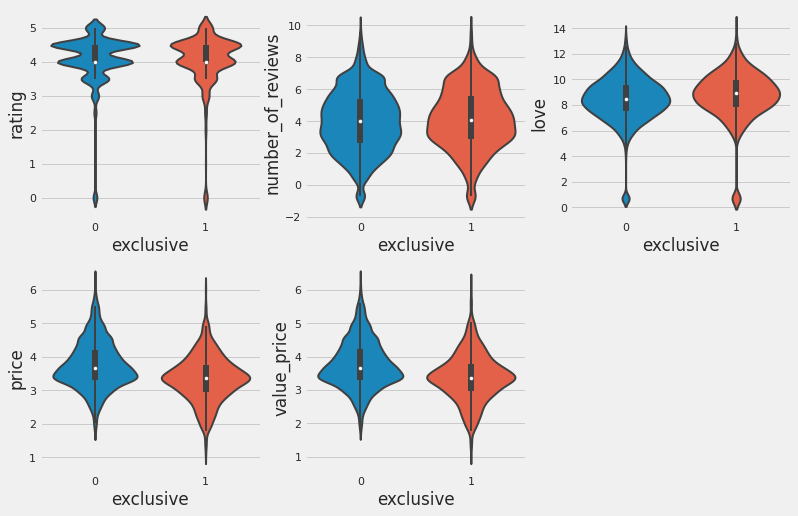

In [ ]:
plt.figure(figsize=(12, 8))
for i in range (0, len(nums)):
  plt.subplot(math.ceil(len(nums)/3), 3, i+1)
  sns.violinplot(data=data, y=nums[i], x='exclusive', linewidth=2, orient='v')

Perhatikan bahwa sekarang hampir semua kolom numerik terlihat memiliki distribusi berbentuk cukup normal. Untuk distribusi normal, kita bisa menggunakan *z-score* untuk membuang outlier seperti di bawah ini:

In [ ]:
from scipy import stats

print("Before removing outlier: ", len(data))

for num in nums:
  if num not in ['id', 'rating']:
    z_scores = np.abs(stats.zscore(data[num]))
    data = data[z_scores <= 3]

print("After removing outlier: ", len(data))

Before removing outlier:  7828
After removing outlier:  7642


Seperti yang terlihat di atas, kita menghapus sekitar ~200 baris yang berisi outlier berdasarkan *z-score*.


## Normalization/Standardization

Seperti yang telah dijelaskan di atas, semua kolom numerik kita sekarang memiliki bentuk distribusi yang lumayan normal. Oleh karena itu, kita akan melakukan standardisasi ke semua kolom kita seperti di bawah ini:

In [ ]:
from sklearn.preprocessing import StandardScaler

for num in nums:
  if num not in ['id', 'rating']:
    data[num] = StandardScaler().fit_transform(data[num].values.reshape(len(data), 1))

In [ ]:
data.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,7.642000e+03,7642.000000,7.642000e+03,7.642000e+03,7.642000e+03,7.642000e+03,7642.000000
mean,1.921106e+06,4.090618,-3.611639e-16,1.777112e-15,1.720570e-15,2.174828e-16,0.258048
std,3.749298e+05,0.742894,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,0.437589
min,6.528000e+03,0.000000,-2.498086e+00,-3.773263e+00,-2.936247e+00,-2.922413e+00,0.000000
25%,1.785730e+06,4.000000,-6.982840e-01,-6.902560e-01,-5.727122e-01,-5.886384e-01,0.000000
50%,2.032664e+06,4.000000,-1.119889e-02,-2.746363e-02,-1.061831e-01,-1.279836e-01,0.000000
75%,2.187092e+06,4.500000,7.299845e-01,6.694274e-01,6.261422e-01,6.185186e-01,1.000000
max,2.293801e+06,5.000000,2.970600e+00,3.302054e+00,3.052605e+00,2.991030e+00,1.000000


Perhatikan bahwa kolom-kolom numerik kita sekarang memiliki simpangan baku = 1 dan rata-rata mendekati 0.

## Feature encoding

Dari EDA kita tahu bahwa kedua kolom kategorikal kita memiliki ratusan kemungkinan nilai. Meski begitu, dengan mempertimbangkan baris data yang hanya ada ~7500, kita akan tetap melakukan *one-hot encoding* dengan catatan apabila di masa depan ketika kita melakukan modeling prosesnya terlalu lambat, kita akan pertimbangkan menghapus kategorinya saja atu menggunakan label encoding.

In [ ]:
for cat in cats:
  data = pd.concat([data, pd.get_dummies(data[cat], prefix=cat)], axis=0)
  data.drop(columns=[cat], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30568 entries, 5 to 7999
Columns: 460 entries, id to category_no category
dtypes: float64(458), object(2)
memory usage: 107.5+ MB


Seperti yang terlihat, sekarang dataset memiliki ratusan kolom hasil *one-hot encoding* dari kolom kategorikalnya.

## Class imbalance
Kita bisa melakukan pengecekan class imbalance dengan menggunakan `value_counts`. Dapat dilihat bahwa perbandingan antara kelas positif dan negatif untuk kolom `exclusive` ada di sekitar 1:3, yang berarti tidak terjadi class imbalance.`

In [ ]:
data['exclusive'].value_counts()

0.0    5670
1.0    1972
Name: exclusive, dtype: int64

Kali ini, kita tidak akan melakukan sampling.

# Conclusion

*In conclusion*, kita sudah dengan sukses melakukan proses *pre-processing* berdasarkan hal yang sudah kita ketahui ketika EDA. Yang kita lakukan antara lain:
- Drop row *null*
- *Log transformation*
- Mengeluarkan *outlier* menggunakan *z-score*
- Standardisasi
- *Feature encoding*